<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_comparativas/kmeansVSjerarquico_MiquelBatalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blobs con diferente numero de observaciones


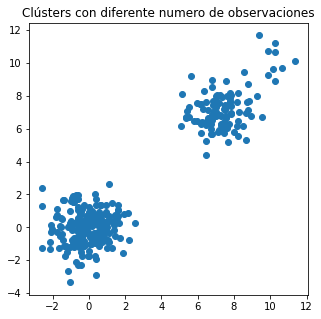

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

n_samples = 1500
centers = [(0, 0), (7,7),(10,10)]
random_state = 170

# Clusteres normales:
X, y = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:200], X[y == 1][:100], X[y == 2][:10]))
Y_filtered = np.hstack((y[y == 0][:200], y[y == 1][:100], y[y == 2][:10]))

plt.figure(figsize=(5, 5))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1])
plt.title("Clústers con diferente numero de observaciones")
plt.show()

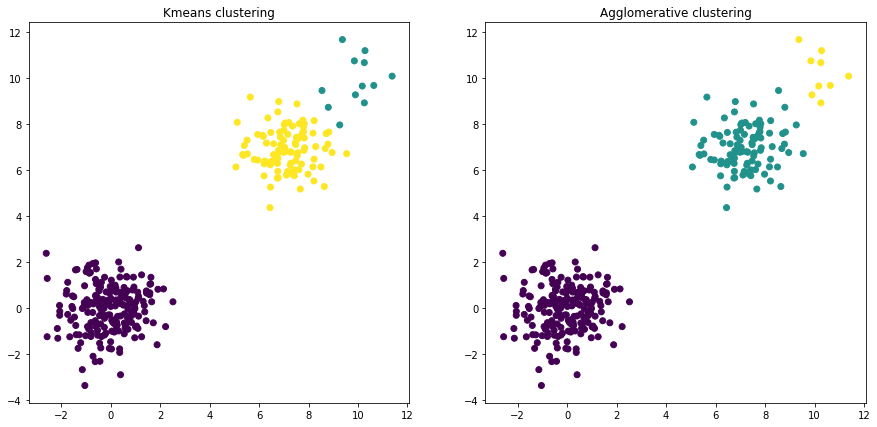

In [64]:
plt.figure(figsize=(15,7))

clust_kmeans = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)
plt.subplot(121)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

plt.subplot(122)
clustering = AgglomerativeClustering(n_clusters=3).fit(X_filtered) 
clust_agg = clustering.fit_predict(X_filtered)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(clust_kmeans, Y_filtered)
cm2 = confusion_matrix(clust_agg, Y_filtered)
print(cm1)
print(cm2)

[[200   0   0]
 [  0   2  10]
 [  0  98   0]]
[[200   0   0]
 [  0 100   1]
 [  0   0   9]]
